# Earthquakes Across Time in a Global Context
## Background on Dataset

*Source:* https://earthquake.usgs.gov/earthquakes/search/

- Covers global earthquake data
- Timespan: Past 30 days - can be expanded to years
- Data Columns:
    - Collection source
    - Earthquake source
    - Earthquake time
    - Earthquake depth
    - Magnitude of earthquake
    - Depth and horizontal error



- USGS: The science bureau within the United States Department of the Interior. They work with global partners to further science and understand natual phenomenon that effects humans globally.
- USGS data is publicly available and aggregates USGS sources and sources from global partners

#### GOAL: Better understand how frequent and drastic earthquakes are, first in the United States, then globally.

In [42]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px

# Concept Base Drawing

In [43]:
import PIL.Image

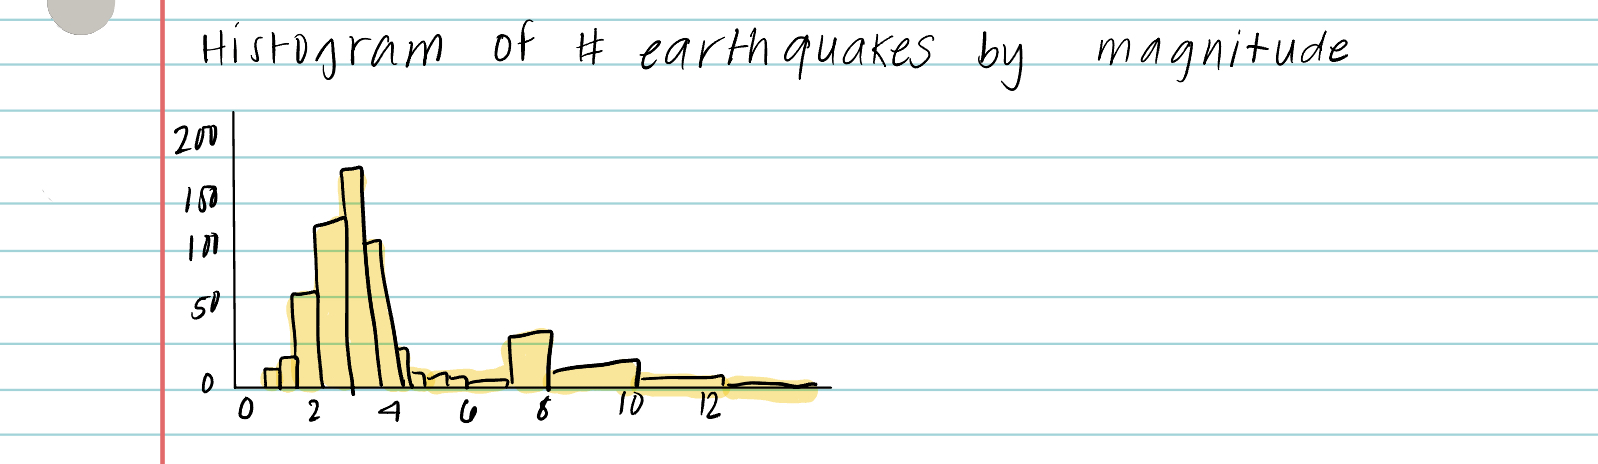

In [44]:
#Histogram of number of earthquakes by magnitude
image_1 = PIL.Image.open("IMG_0063.jpg")
image_1

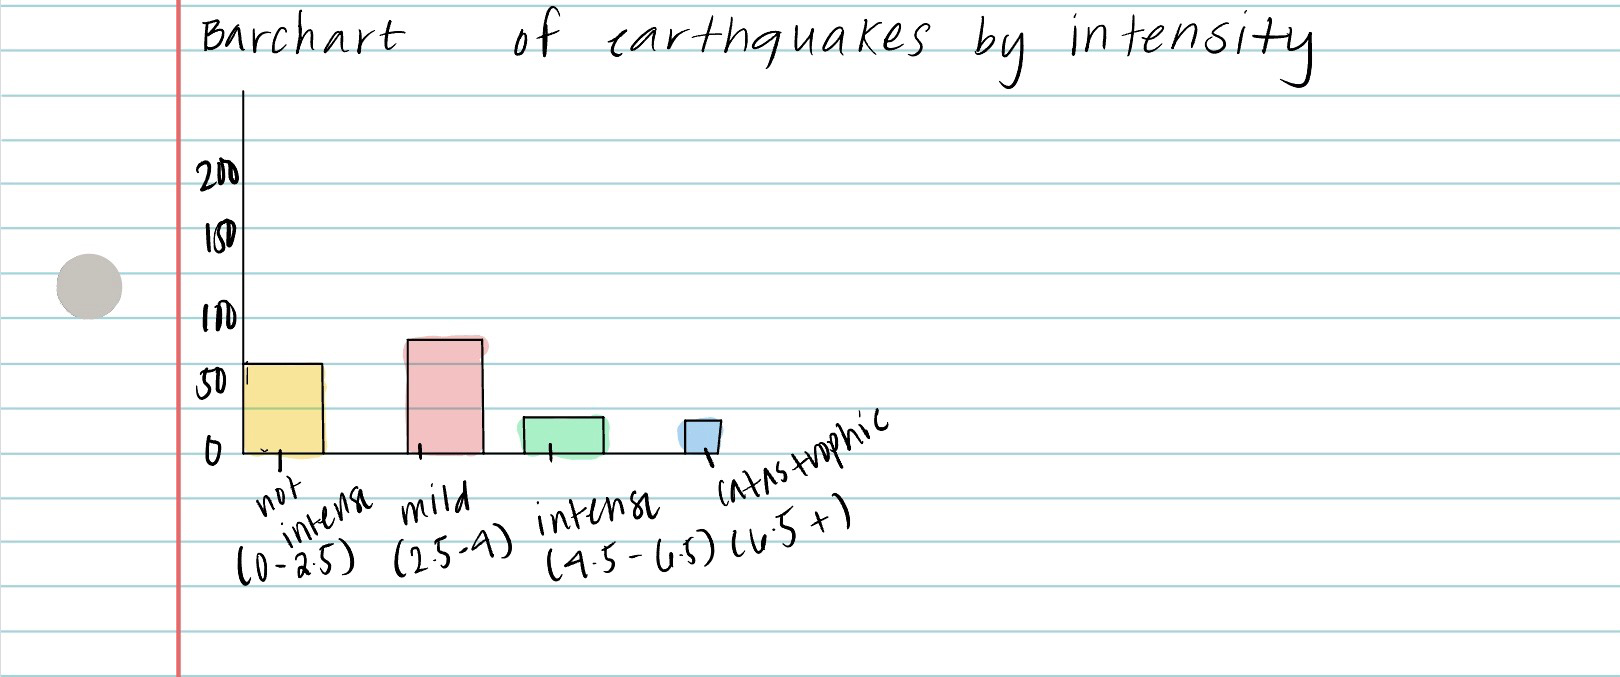

In [45]:
# Bar chart of total earthquakes by intensity (magnitude)
image_2 = PIL.Image.open("IMG_0062.jpeg")
image_2

# Bar Charts with Py

In [46]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import requests
import io
df = pd.read_csv('data_10k.csv')
# Converting time column to datetime obj and splitting it up into year, month and day to potentially use it as filters later.
df['time'] = pd.to_datetime(df['time'])
df['year'] = pd.DatetimeIndex(df['time']).year
df['month'] = pd.DatetimeIndex(df['time']).month
df['day'] = pd.DatetimeIndex(df['time']).day

#Splitting column based on comma to see if it actually contains only state names that can also be used later
df['location_after_comma'] = df['place'].str.rsplit(',').str[-1]

In [47]:
import plotly.express as px
fig = px.histogram(df[df['nst']<=100], x="nst")
fig.show()

# Simple Map

In [48]:
# !wget https://earthquake.usgs.gov/fdsnws/event/1/query.csv?starttime=2022-10-29%2000:00:00&endtime=2022-11-28%2023:59:59&maxlatitude=50&minlatitude=24.6&maxlongitude=-65&minlongitude=-125&minmagnitude=2.5&orderby=time

In [49]:
USGS_30_day = pd.read_csv("query.csv")

In [50]:
scale_value = 100 / (USGS_30_day['mag'].max() - USGS_30_day['mag'].min()) 
USGS_30_day['mag_scaled'] = (scale_value * USGS_30_day['mag']) - (USGS_30_day['mag'].min() * scale_value)

In [51]:
plot = px.scatter_geo(USGS_30_day, lat="latitude", lon="longitude", size=USGS_30_day['mag_scaled'], color=USGS_30_day['depth'])
plot.show()

# Interactive Map with Political Boundaries

In [52]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import requests
import io

df = pd.read_csv('data_10k.csv')


In [53]:
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_name="place", hover_data=["type", "mag"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Interative Map based on Time

In [54]:
# import plotly.express as px

def map_robinson(df, color, animation_frame):
# country = px.data.gapminder()
    fig = px.scatter_geo(df, lat="latitude", lon="longitude", 
                         hover_name="place", color = color,
                         animation_frame = animation_frame,
                         projection="natural earth",
                         width = 900, height = 600
                         # projection="orthographic"
                         )                     
    fig.show()

In [55]:
# Converting time column to datetime obj and splitting it up into year, month and day to potentially use it as filters later.
df['time'] = pd.to_datetime(df['time'])
df['year'] = pd.DatetimeIndex(df['time']).year
df['month'] = pd.DatetimeIndex(df['time']).month
df['day'] = pd.DatetimeIndex(df['time']).day

#Splitting column based on comma to see if it actually contains only state names that can also be used later
df['location_after_comma'] = df['place'].str.rsplit(',').str[-1]

In [56]:
map_robinson(df, "depth", "day")

# Understanding Magnitude in the context of Time and Date

In [57]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px

In [58]:
usgs = pd.read_csv("query.csv", parse_dates=['time'])
#Adding a new column to the dataframe 1 which records just the date of the observation
usgs['date'] = usgs['time'].dt.date
#Filtering date after 22nd Nov for the visualization by creating a new dataframe (2)
usgs_1 = usgs[usgs['date'] >= pd.Timestamp('2022-11-22')]
#Parsing the dataframe 2's date
usgs_1['date'] = pd.to_datetime(usgs['date'])
#Extracting the day information and adding a new column 
usgs_1['day_no'] = usgs_1['date'].dt.day

/Users/hadley/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

/var/folders/l0/p_fsjr6s2j72sjcf_7t9j3m00000gn/T/ipykernel_1977/1989713873.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/l0/p_fsjr6s2j72sjcf_7t9j3m00000gn/T/ipykernel_1977/1989713873.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

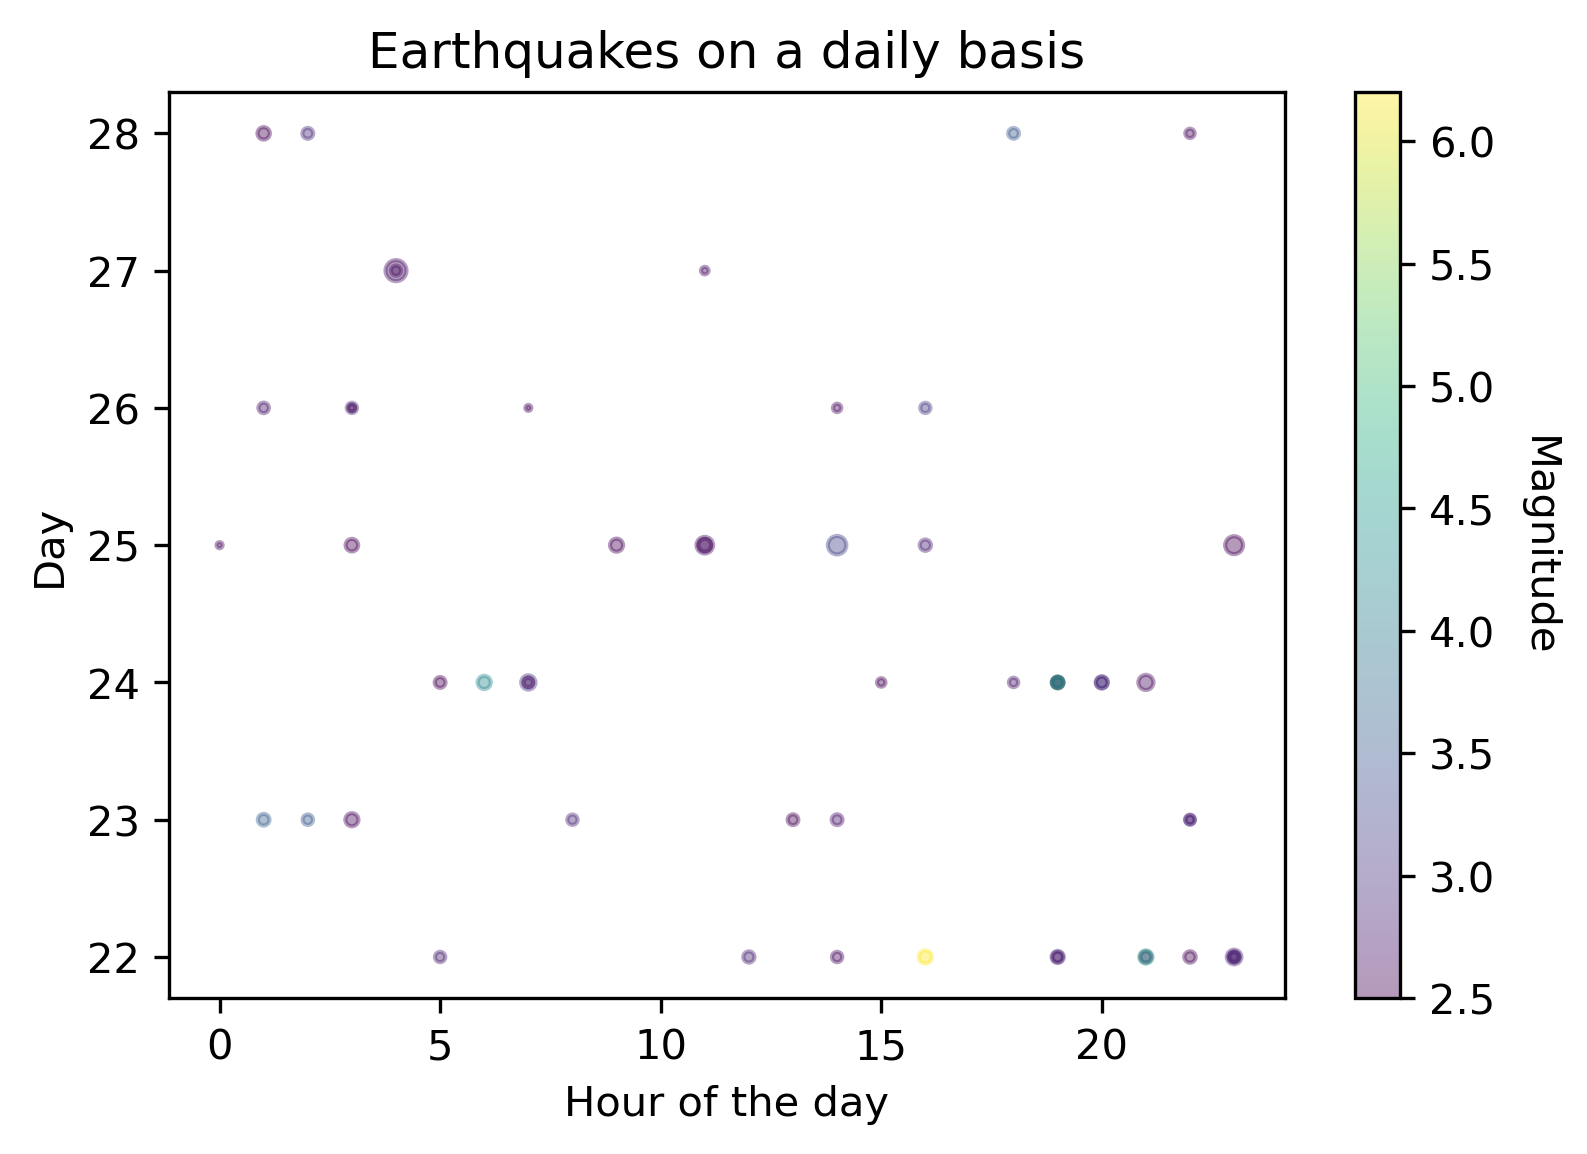

In [59]:
#Plot to visualize the pattern of earthquakes from 22nd Nov
#Plotted showing everyday occurences
#the size of scatter points changes as per the depth of the earthquake
#The color shows the magnitude of the recorded earthquake.
fig, ax = plt.subplots(dpi = 300)
c = ax.scatter(usgs_1['time'].dt.hour,usgs_1['day_no'], 
               c = usgs_1['mag'], s = usgs_1['depth'].values, 
              alpha = 0.4)
ax.set_xlabel("Hour of the day")
ax.set_ylabel("Day")
ax.set_title("Earthquakes on a daily basis")
cbar = fig.colorbar(c)
cbar.set_label('Magnitude', rotation=270, labelpad=15)

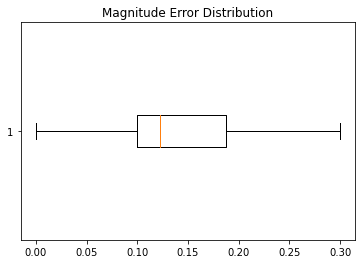

In [60]:
#Boxplot for errors
usgs_1 = usgs_1.dropna(subset=['magError', 'horizontalError','depthError'])
fig, ax = plt.subplots()
ax.boxplot(usgs_1['magError'], vert = False)
plt.title("Magnitude Error Distribution")
plt.show()

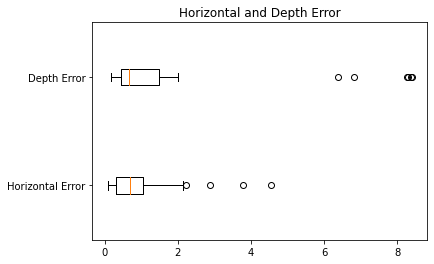

In [61]:
error = [usgs_1['horizontalError'],usgs_1['depthError']]
fig, ax = plt.subplots()
ax.boxplot(error, vert = False)
plt.title("Horizontal and Depth Error")
ax.set_yticklabels(['Horizontal Error','Depth Error'])
plt.show()

### Future plans
- Interactivity with user selection
- Allowing time selection
- More!